In [4]:
# This project implements the Black-Scholes Model for pricing European call and put options

In [21]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

In [22]:
# Writing the pricing function (Section 1 page 1)

In [23]:
# Black-Scholes call function
# Call Option -> gives you the right to buy the underlying asset at strike price K
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    call = S * si.norm.cdf(d1) - K * np.exp(-r*T) * si.norm.cdf(d2)
    return call

In [24]:
# Black-Scholes put function
# Put Option -> gives you the right to sell the underlying asset at strike price K
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    put = K * np.exp(-r*T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)
    return put

In [25]:
# Testing values
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

In [26]:
# Compute call and put
call_price = black_scholes_call(S, K, T, r, sigma)
put_price = black_scholes_put(S, K, T, r, sigma)

print("Call price:", call_price)
print("Put price:", put_price)

Call price: 10.450583572185565
Put price: 5.573526022256971


In [27]:
# Adding Visualisations: This helps us to see how the call price changes as stock price changes
# Stock prices from 50 to 150
S_values = np.arange(50, 151, 5)  # 50, 55, 60, ..., 150

In [28]:
call_prices = []

# Use the Black-Scholes function
for S in S_values:
    price = black_scholes_call(S, K=100, T=1, r=0.05, sigma=0.2)
    call_prices.append(price)

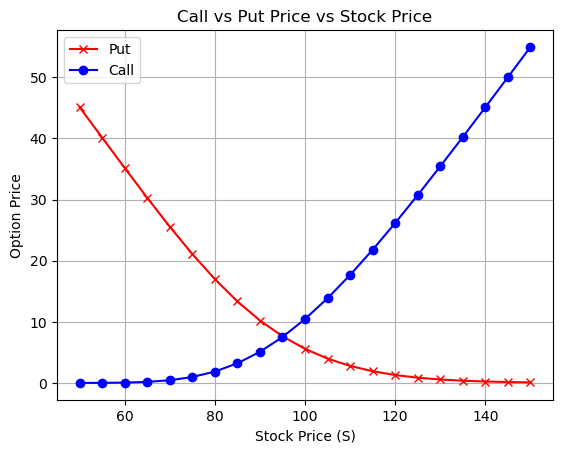

In [29]:
put_prices = [black_scholes_put(S, K=100, T=1, r=0.05, sigma=0.2) for S in S_values]

plt.plot(S_values, put_prices, marker='x', color='red', label='Put')
plt.plot(S_values, call_prices, marker='o', color='blue', label='Call')
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price")
plt.title("Call vs Put Price vs Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Greeks measure how option prices change with different factors -> Delta
# Delta for a call option
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
    return si.norm.cdf(d1)

# Delta for a put option
def delta_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
    return si.norm.cdf(d1)

In [31]:
delta_calls = [delta_call(S, K=100, T=1, r=0.05, sigma=0.2) for S in S_values]
delta_puts = [delta_put(S, K=100, T=1, r=0.05, sigma=0.2) for S in S_values]

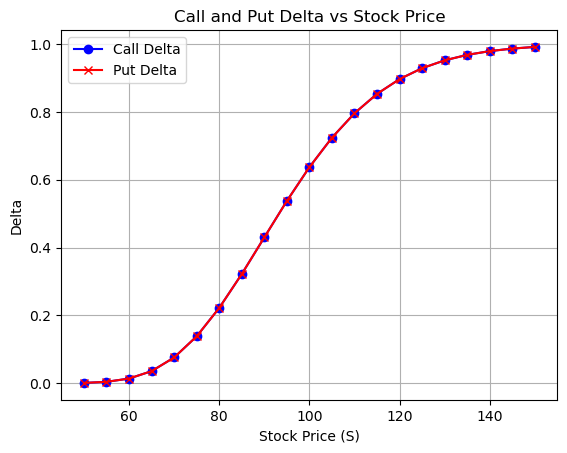

In [32]:
# This plot shows how sensitive options are to stock price changes
plt.plot(S_values, delta_calls, marker='o', color='blue', label='Call Delta')
plt.plot(S_values, delta_puts, marker='x', color='red', label='Put Delta')
plt.xlabel("Stock Price (S)")
plt.ylabel("Delta")
plt.title("Call and Put Delta vs Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# This assumption section explains: 
# 1. What conditions the Black-Scholes formula relies on
# 2. What simplifications you are making
# 3. Where the model may not be realistic
# Because real markets violate some of these assumptions

## Assumptions of the Black–Scholes Model

1. The stock price follows a geometric Brownian motion with constant volatility.
2. The risk-free interest rate r is constant over time.
3. No dividends are paid during the option’s life.
4. No transaction costs or taxes.
5. Options are European-style, meaning they can only be exercised at maturity.
6. Markets are frictionless, with continuous trading.
7. Investors can borrow and lend at the risk-free rate.

## Limitations of the Black–Scholes Model

- Real volatility is not constant.
- Market jumps and fat tails are ignored.
- Early exercise of American options is not considered.
- Liquidity and transaction costs are ignored.